# Unsupervised learning - Python - hierarchical clustering

In [1]:
import pandas as pd

dataset = pd.read_csv('data/mall_customers.csv')
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,109,Male,68,63,43
1,131,Male,47,71,9
2,33,Male,53,33,4
3,16,Male,22,20,79
4,23,Female,46,25,5


In [2]:
# take columns with indices 3 and 4
X = dataset.iloc[:, [3, 4]].values
X[:5, :]

array([[63, 43],
       [71,  9],
       [33,  4],
       [20, 79],
       [25,  5]])

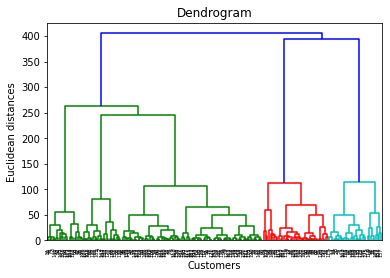

In [3]:
%matplotlib inline

# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# linkage is the algorithm itself
# method: ward -> method used to find the cluster (minimize the variance between each cluster)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# take the largest distance that doesn't cross horizontal line -> set threshold to get 5 clusters

In [4]:
# Fitting Hierarchical Clustering to the dataset
# use the most common one Agglomerative, the other one less used is divisive
from sklearn.cluster import AgglomerativeClustering

# linkage ward is the algorithm (minimize the variance)
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# vectors of clusters of the datapoints
print('Size: ', y_hc.size)
y_hc

Size:  200


array([1, 0, 4, 3, 4, 1, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 2, 2, 0,
       4, 1, 1, 1, 0, 1, 1, 3, 2, 1, 0, 1, 1, 3, 2, 2, 4, 0, 1, 1, 3, 1,
       1, 4, 3, 1, 2, 3, 1, 3, 3, 3, 0, 2, 1, 0, 1, 0, 1, 4, 1, 2, 1, 3,
       1, 0, 4, 0, 2, 0, 1, 1, 3, 1, 2, 1, 3, 1, 1, 2, 1, 4, 2, 2, 2, 1,
       2, 4, 2, 4, 1, 1, 1, 1, 1, 2, 0, 3, 1, 2, 0, 1, 3, 1, 0, 0, 4, 2,
       1, 1, 1, 0, 3, 1, 0, 1, 0, 2, 2, 1, 4, 2, 1, 1, 1, 4, 1, 1, 1, 1,
       4, 4, 1, 0, 1, 0, 1, 2, 0, 3, 1, 4, 1, 1, 2, 2, 1, 1, 1, 4, 1, 2,
       4, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 3, 3, 0, 4, 1, 1, 0, 2, 1,
       0, 1, 3, 3, 1, 4, 1, 4, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 3, 0, 4, 2,
       0, 1])

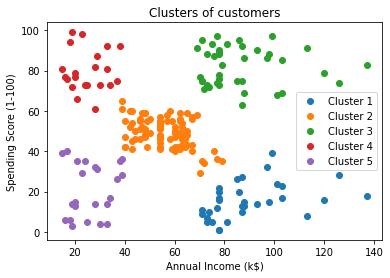

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

# Visualising the clusters
for i in range(0, 5):
    plt.scatter(X[y_hc == i, 0], X[y_hc == i, 1], label = 'Cluster ' + str(i + 1))
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()